# Random Forests para Arboles de Regresion

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('../python-ml-course/datasets/boston/Boston.csv')
dataset.head()
#https://www.kaggle.com/c/boston-housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
dataset.shape

(506, 14)

### Procesamiento de Datos

In [4]:
predictors=dataset.columns.values.tolist()[:13]
target=dataset.columns.values.tolist()[13]
X=dataset[predictors]
Y=dataset[target]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=.3,random_state=0)

### Creacion del modelo

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
regtree=DecisionTreeRegressor(min_samples_split=30,min_samples_leaf=10,random_state=0)
regtree.fit(x_train,y_train)
predictions=regtree.predict(x_test)

list(zip(predictions,y_test))[:11]

[(23.659259259259258, 22.6),
 (26.742105263157896, 50.0),
 (23.05454545454546, 23.0),
 (13.891304347826088, 8.3),
 (19.487999999999996, 21.2),
 (21.518181818181816, 19.9),
 (21.4047619047619, 20.6),
 (21.518181818181816, 18.7),
 (21.4047619047619, 16.1),
 (19.757894736842108, 18.6),
 (10.466666666666667, 8.8)]

### Visualizacion de Arbol

In [9]:
from sklearn.tree import export_graphviz

In [10]:
with open('boston-rtree.dot','w') as dotfile: #creamos un archivo llamado iris-dtree.dot
    export_graphviz(regtree,out_file=dotfile,feature_names=predictors) #seteamos los parametros(modelo,archivo,predictores)
    dotfile.close()

In [11]:
import os
from graphviz import Source #(conda install python-graphviz)

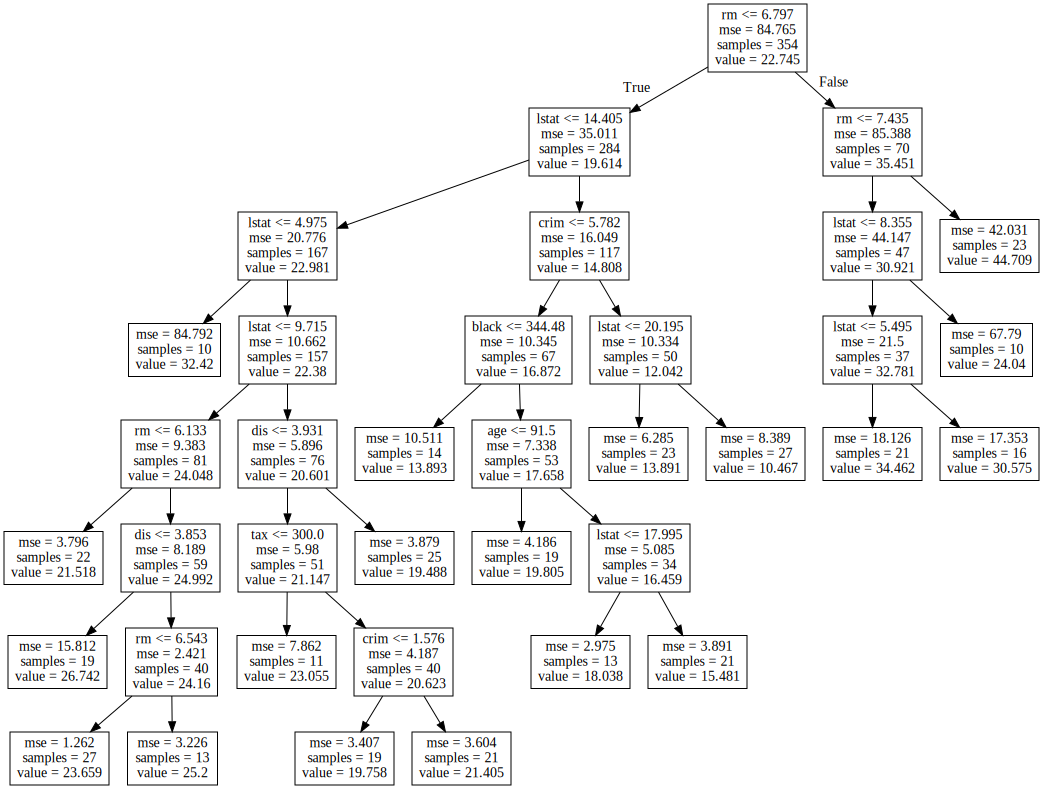

In [12]:
file=open('boston-rtree.dot','r')
text=file.read()
Source(text)

### Validacion del Modelo

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [14]:
cross_validation=KFold(n_splits=10,shuffle=True,random_state=1)
scores=cross_val_score(regtree,X,Y,scoring='mean_squared_error',cv=cross_validation,)
scores.mean()#score basado en el error cuadrado (mas cercano a cero es mejor)

/home/jess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jess/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/je

-20.107307036443846

In [15]:
list(zip(predictors,regtree.feature_importances_)) #importancia de las variables

[('crim', 0.027408822548249674),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.0),
 ('rm', 0.6798194971320766),
 ('age', 0.005383674422757539),
 ('dis', 0.005208671542042429),
 ('rad', 0.0),
 ('tax', 0.0020127138087849723),
 ('ptratio', 0.0),
 ('black', 0.006193859266693023),
 ('lstat', 0.27397276127939585)]

# Random Forests

### >>>Los Forests no necesitan Vakidacion cruzada

In [16]:
from sklearn.ensemble import RandomForestRegressor

/home/jess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
forest=RandomForestRegressor(n_jobs=2,oob_score=True,n_estimators=500)
#oob_score=Si queremos que el modelo generalize las muestras
#n_estimators=numero de arboles del forest
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [48]:
matches=pd.DataFrame(list(zip(forest.oob_prediction_,y_train)),columns=['Predicciones','Real'])
matches[:11]

,Predicciones,Real
0,14.034409,14.4
1,24.703529,24.4
2,17.763187,18.1
3,24.378022,22.5
4,18.177838,20.5
5,15.827684,15.2
6,19.827841,17.4
7,14.575141,13.6
8,9.975740,8.7
9,19.270690,18.2


In [50]:
matches['err2']=(matches['Predicciones']-matches['Real'])**2
error=sum(matches['err2'])/len(matches)
print('Error: ',error)

Error:  10.598874323690898


In [47]:
score=forest.oob_score_
print('Score: ',score)

Score:  0.8749609489890062
